Introduction

The dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 

The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

References
Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.
Data resouce:https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import seaborn as sns


In [67]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.shape




(2111, 17)

In [68]:
df.isnull().sum()#check if there is null value

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [69]:
df=df.drop_duplicates()#check if there is duplicates and delete duplicates 
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [70]:
df.info()
#5 FAVC (Frequent consumption of high caloric food)
#6 FCVC (Frequency of Consumption of Vegetables)
#7 NCP  (Number of Main Meals)
#8 CAEC Consumption of food between meals
#10 CH20 (Consumption of Water Daily)
#11 SCC  (Calories consumption monitoring）
#12 FAF  (Physical Activity Frequency)
#13 TUE (Time Using Technology Devices)
#14 CALC (Consumption of alcohol)
#15 MTRANS(Transportation used)
#15 NObeyesdad (Obesity Types)
 





<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [71]:
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [72]:
corrections = {'Insufficient_Weight':'IW', 'Normal_Weight':'NW', 'Overweight_Level_I':'OLI', 'Overweight_Level_II':'OLII', 'Obesity_Type_I':'OTI', 'Obesity_Type_II':'OTII', 'Obesity_Type_III':'OTIII'}
df['NObeyesdad'] = df['NObeyesdad'].replace(corrections)
df['NObeyesdad'].unique()

array(['NW', 'OLI', 'OLII', 'OTI', 'IW', 'OTII', 'OTIII'], dtype=object)

In [73]:
df['NObeyesdad'].value_counts()

OTI      351
OTIII    324
OTII     297
OLII     290
NW       282
OLI      276
IW       267
Name: NObeyesdad, dtype: int64

In [74]:
df11= pd.DataFrame()
df11['Obesity types']=['OTI','OTIII','OTII','OLII','NW','OLI','IW']
df11['Count']=list(df['NObeyesdad'].value_counts())
df11

,Obesity types,Count
0,OTI,351
1,OTIII,324
2,OTII,297
3,OLII,290
4,NW,282
5,OLI,276
6,IW,267


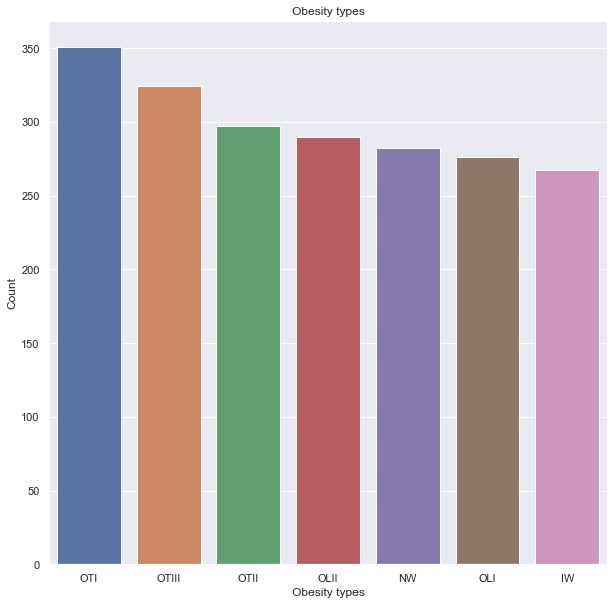

In [75]:
plt.title("Obesity types")
sns.barplot(x=df11["Obesity types"],y=df11['Count'])
sns.set(rc = {'figure.figsize':(10,8)})

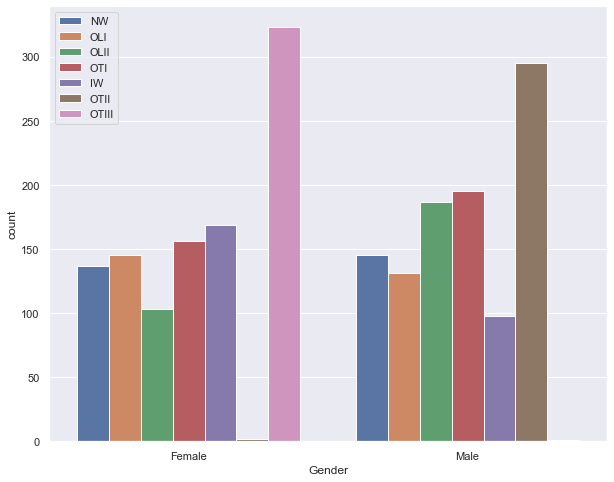

In [76]:
sns.countplot(x="Gender", hue="NObeyesdad", data=df)
plt.legend(loc='upper left')

<AxesSubplot:xlabel='Age', ylabel='NObeyesdad'>

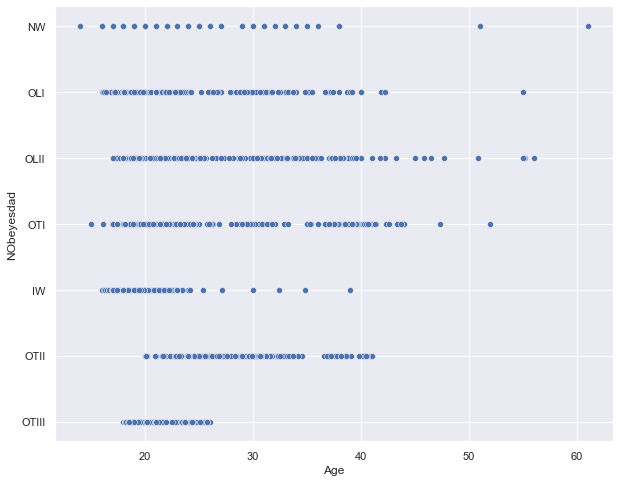

In [77]:
sns.scatterplot(data = df, x = "Age", y = "NObeyesdad") # Obesity type III (unter 30) and II also insufficient weight (under 40) only among younger people 

<AxesSubplot:xlabel='Height', ylabel='NObeyesdad'>

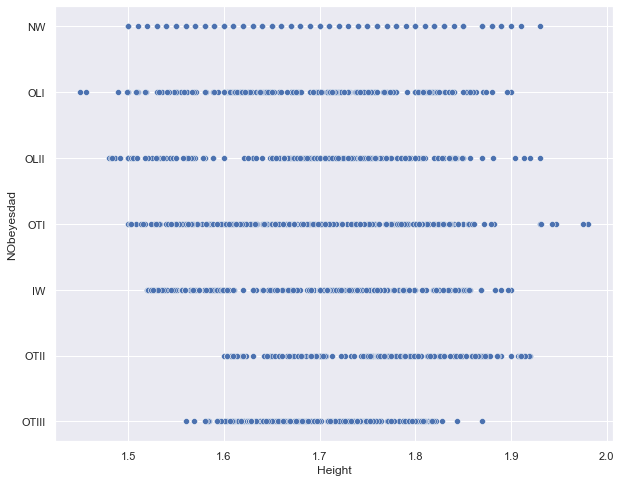

In [78]:
sns.scatterplot(data = df, x = "Height", y = "NObeyesdad")

<AxesSubplot:xlabel='Weight', ylabel='NObeyesdad'>

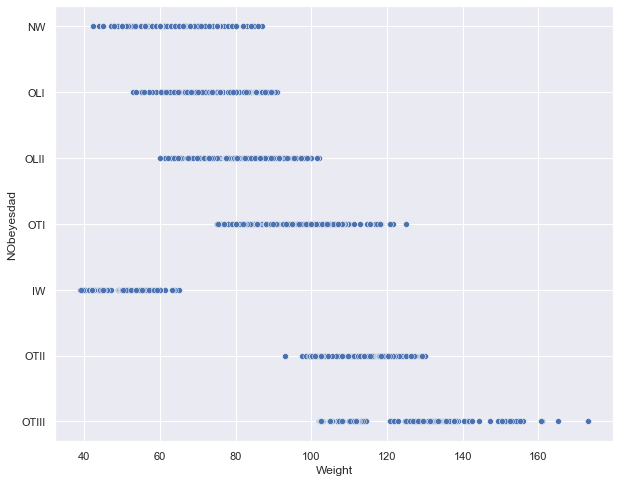

In [79]:
sns.scatterplot(data = df, x = "Weight", y = "NObeyesdad")

In [80]:
df['family_history_with_overweight'].value_counts()

yes    1722
no      365
Name: family_history_with_overweight, dtype: int64

<AxesSubplot:xlabel='family_history_with_overweight', ylabel='count'>

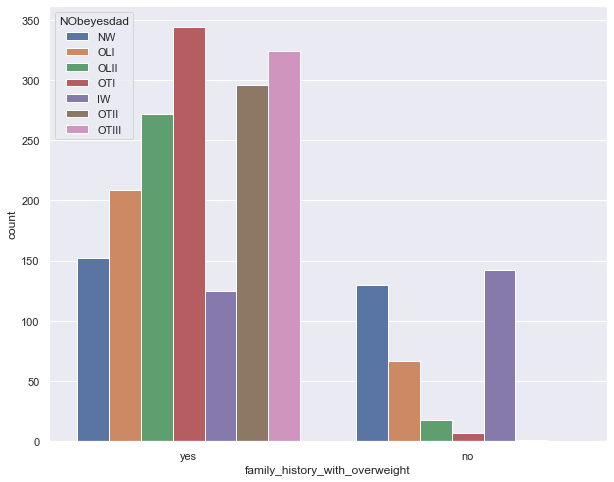

In [81]:
sns.countplot(x="family_history_with_overweight", hue="NObeyesdad", data=df)

In [82]:
df['FAVC'].value_counts()# Frequent consumption of high caloric food

yes    1844
no      243
Name: FAVC, dtype: int64

<AxesSubplot:xlabel='FAVC', ylabel='count'>

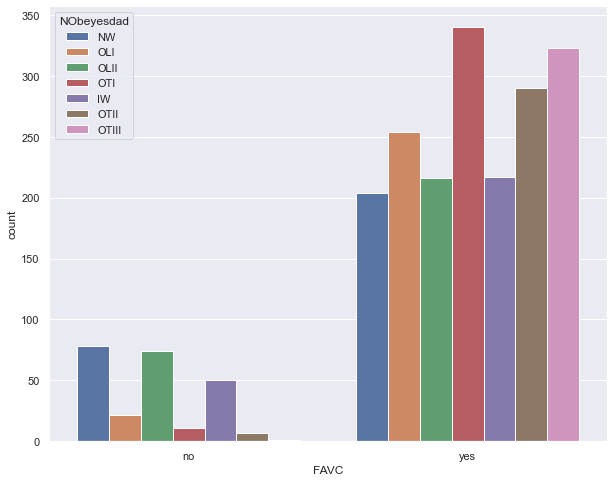

In [83]:
sns.countplot(x="FAVC", hue="NObeyesdad", data=df)

In [84]:
df['FCVC']=df['FCVC'].round(decimals=0)#Frequency of Consumption of Vegetables


In [85]:
df['FCVC'].value_counts()

2.0    994
3.0    991
1.0    102
Name: FCVC, dtype: int64

<AxesSubplot:xlabel='FCVC', ylabel='count'>

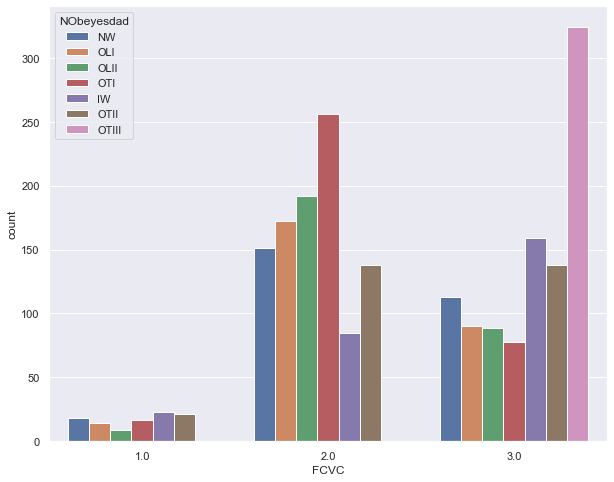

In [86]:
sns.countplot(x="FCVC", hue="NObeyesdad", data=df)

In [87]:
df['NCP']=df['NCP'].round(decimals=0)

In [88]:
df['NCP'].value_counts()#Number of Main Meals

3.0    1466
1.0     296
2.0     176
4.0     149
Name: NCP, dtype: int64

<AxesSubplot:xlabel='NCP', ylabel='count'>

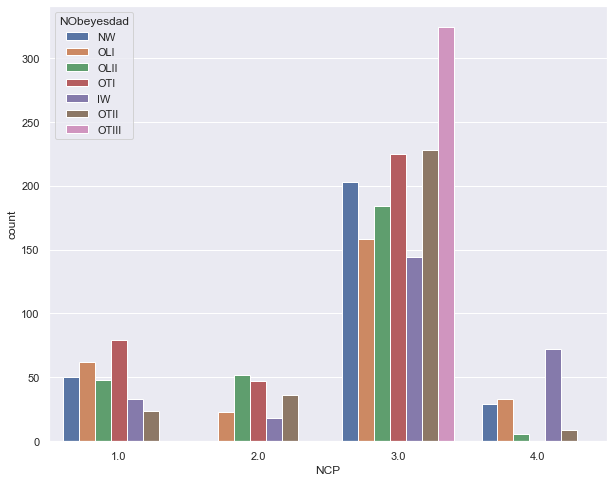

In [89]:
sns.countplot(x="NCP", hue="NObeyesdad", data=df)

In [90]:
df['CAEC'].value_counts()#Consumption of food between meals

Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64

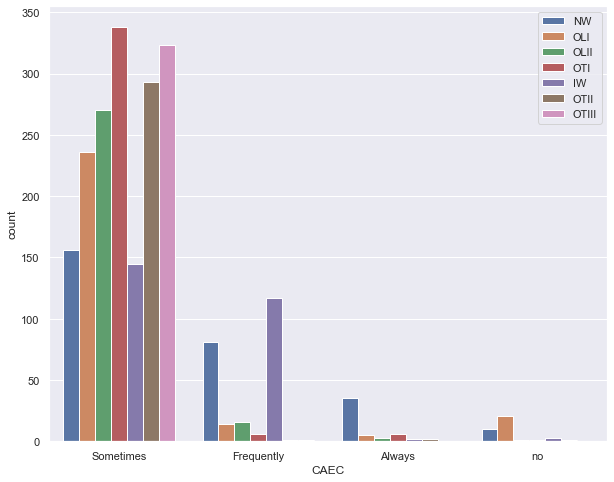

In [91]:
sns.countplot(x="CAEC", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')

In [92]:
df['SMOKE'].value_counts()

no     2043
yes      44
Name: SMOKE, dtype: int64

<AxesSubplot:xlabel='SMOKE', ylabel='count'>

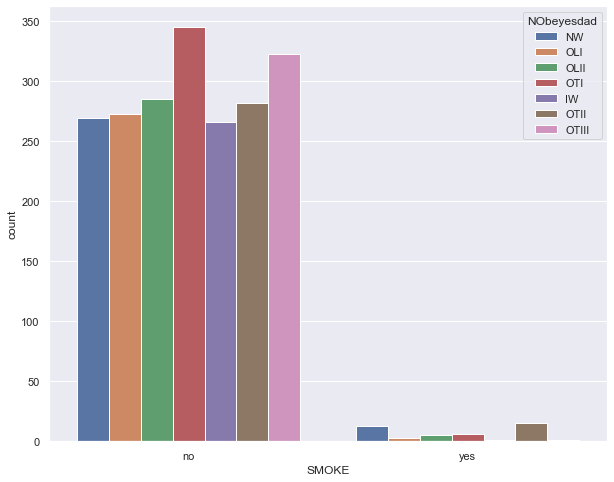

In [93]:
sns.countplot(x="SMOKE", hue="NObeyesdad", data=df)

In [94]:
df['CH2O']=df['CH2O'].round(decimals=0)#consumption of Water Daily

In [95]:
df['CH2O'].value_counts()

2.0    1107
3.0     502
1.0     478
Name: CH2O, dtype: int64

<AxesSubplot:xlabel='CH2O', ylabel='count'>

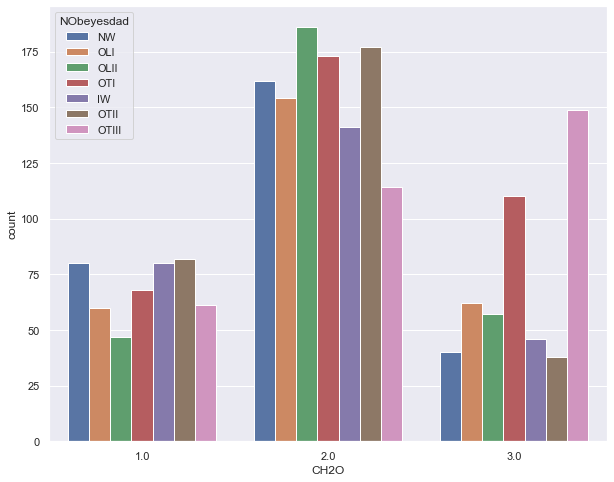

In [96]:
sns.countplot(x="CH2O", hue="NObeyesdad", data=df)

In [97]:
df['SCC'].value_counts()#Calories consumption monitoring

no     1991
yes      96
Name: SCC, dtype: int64

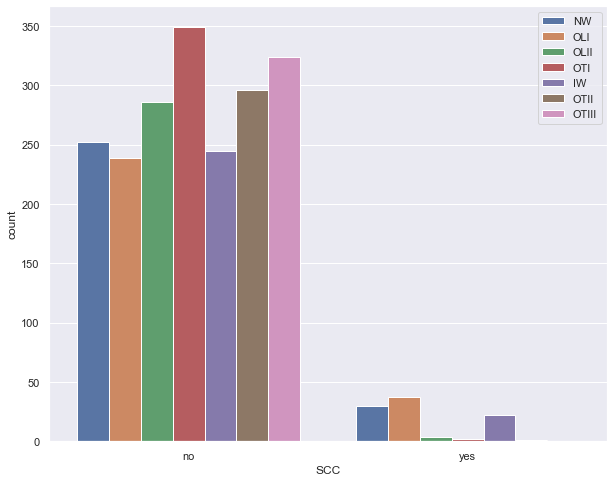

In [98]:
sns.countplot(x="SCC", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')

In [99]:
df['FAF']=df['FAF'].round(decimals=0)

In [100]:
df['FAF'].value_counts()

1.0    759
0.0    714
2.0    495
3.0    119
Name: FAF, dtype: int64

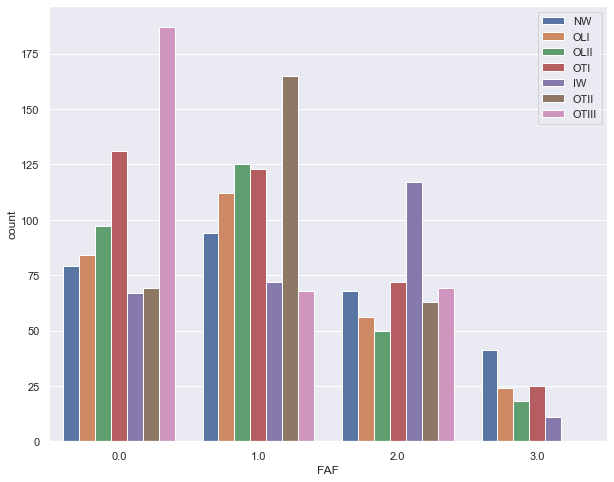

In [101]:
sns.countplot(x="FAF", hue="NObeyesdad", data=df)#Physical Activity Frequency
plt.legend(loc='upper right')

In [102]:
df['TUE']=df['TUE'].round(decimals=0)

In [103]:
df['TUE'].value_counts()#Time Using Technology Devices

0.0    932
1.0    912
2.0    243
Name: TUE, dtype: int64

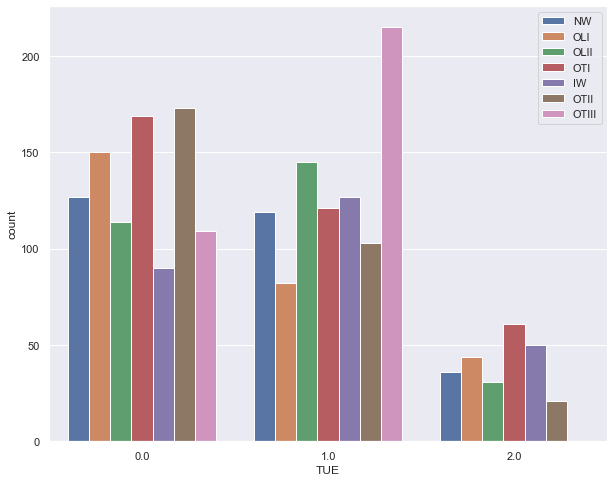

In [104]:
sns.countplot(x="TUE", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')

In [105]:
df['CALC'].value_counts()#consumption of alcohol

Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64

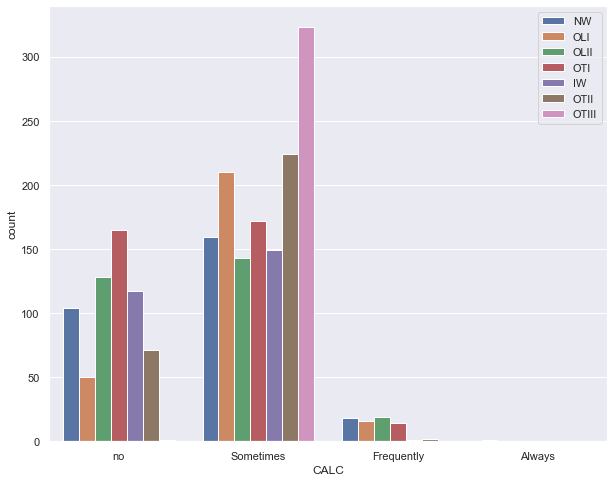

In [106]:
sns.countplot(x="CALC", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')

In [107]:
df['MTRANS'].value_counts()#Transportation used

Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

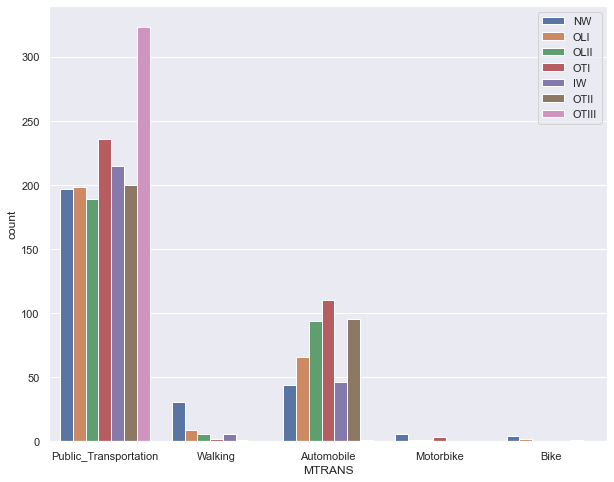

In [108]:
sns.countplot(x="MTRANS", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')


In [109]:
#df.drop(['MTRANS','SMOKE','CAEC','SCC'], axis=1, inplace=True)# delete columns which are not very relevant

In [110]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [111]:
corrections1= {'Male':1, 'Female':0}
df['Gender'] = df['Gender'].replace(corrections1)

In [112]:
corrections2= {'yes':1, 'no':0}
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace(corrections2)

In [113]:
corrections3= {'no':1, 'Sometimes':2, 'Frequently': 3,'Always':4}
df['CAEC'] = df['CAEC'].replace(corrections3)

In [114]:
corrections4= {'yes':1, 'no':0}
df['SMOKE'] = df['SMOKE'].replace(corrections4)

In [115]:
corrections5= {'yes':1, 'no':0}
df['FAVC'] = df['FAVC'].replace(corrections5)

In [116]:
corrections6= {'yes':1, 'no':0}
df['SCC'] = df['SCC'].replace(corrections6)

In [117]:
corrections7= {'no':1, 'Sometimes':2, 'Frequently': 3,'Always':4}
df['CALC'] = df['CALC'].replace(corrections7)

In [118]:
corrections8= {'Public_Transportation':1, 'Automobile':2, 'Walking':3, 'Motorbike':4, 'Bike':5}
df['MTRANS'] = df['MTRANS'].replace(corrections8)

In [119]:
attributes=["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]

In [120]:

NObeyesdad_map = {'IW':1, 'NW':2, 'OLI':3, 'OLII':4, 'OTI':5, 'OTII':6, 'OTIII':7}
df['NObeyesdad'] = df['NObeyesdad'].map(NObeyesdad_map)

In [121]:
df1=df[df["NObeyesdad"]==1][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df1.shape
df2=df[df["NObeyesdad"]==2][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df2.shape
df3=df[df["NObeyesdad"]==3][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df3.shape
df4=df[df["NObeyesdad"]==4][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df4.shape
df5=df[df["NObeyesdad"]==5][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df5.shape
df6=df[df["NObeyesdad"]==6][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df6.shape
df7=df[df["NObeyesdad"]==7][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df7.shape




     


(324, 17)

In [122]:
for c in attributes:
    corr= np.corrcoef(df[c], df["NObeyesdad"])[0][1]
    print(c +": " , corr)


Gender:  -0.031919921680758946
Age:  0.2792305381751142
Height:  0.12486287925740679
Weight:  0.9124530170421005
family_history_with_overweight:  0.5033735794018178
FAVC:  0.24992663312265712
FCVC:  0.19613872455802975
NCP:  0.005712288760834162
CAEC:  -0.34220539017500456
SMOKE:  0.0019843306040487323
CH2O:  0.13908259814500265
SCC:  -0.1978191536642808
FAF:  -0.2029471518310146
TUE:  -0.08592477756230028
CALC:  0.1552995739401481
MTRANS:  -0.1267807282041076
NObeyesdad:  1.0


In [123]:
df.drop(['Gender','MTRANS','SMOKE','NCP','TUE'], axis=1, inplace=True)

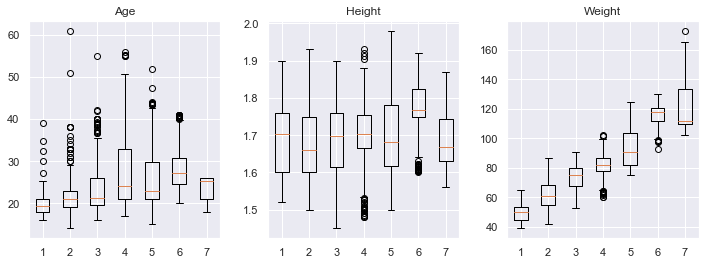

In [124]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
attributesplt=["Age", "Height", "Weight"]
for j in range(3):
        k = j
        attr = attributesplt[k]
        ax = axs[j]
        ax.boxplot([df1[attr], df2[attr], df3[attr], df4[attr], df5[attr], df6[attr], df7[attr]])
        ax.set_title(attr)
        ax.set_xticklabels(['1', '2','3','4', '5','6','7'])
plt.subplots_adjust(wspace=.25, hspace=.25)       

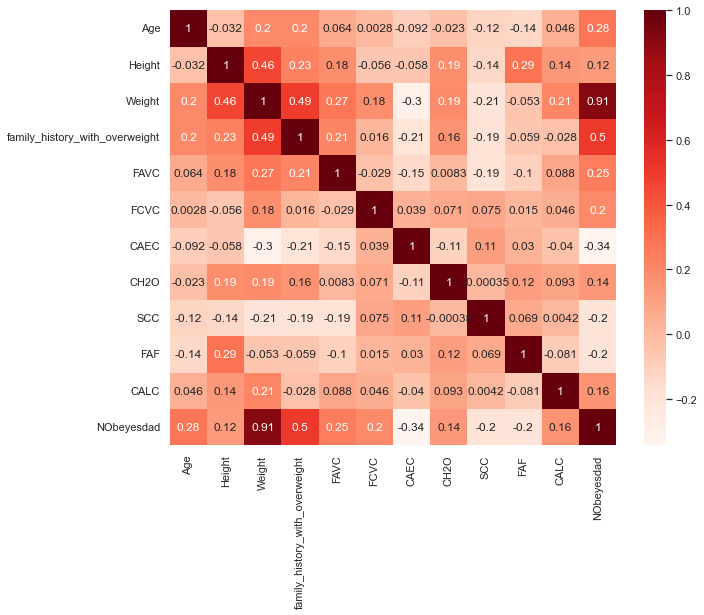

In [125]:
sns.heatmap(df.corr(), annot= True, cmap= 'Reds')
sns.set(rc = {'figure.figsize':(10,10)})

Statistical Analysis

Test 1: Perform a t-test to examine a hypothesis that says: the average age of people with obesity is greater than 25 years, with a 99% confidence level.


In [126]:
X= df[df["NObeyesdad"]>2]["Age"]
print(len(X), X.mean())

alpha=0.01

tsat, pval= stats.ttest_1samp(a=X, popmean=24, alternative="greater")
print("P-value: ", pval)
print("t-statistic: ", tsat)

if pval <alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")


1538 25.624094864759435
P-value:  3.258591862972028e-22
t-statistic:  9.769352673632287
we reject the null hypothesis


Test 2: Perform a t-test to examine the hypothesis that says: the average age for people of insufficient weight and people with obesity is different for survived patients from deceased patients.

In [128]:

A=df[df["NObeyesdad"]<2]["Age"]
B=df[df["NObeyesdad"]>2]["Age"]
print(len(A), A.mean())
print(len(B), B.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=A, b=B, alternative="two-sided")
print("P-value: ", pval)
print("t-statistic: ", tsat)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")



     


267 19.7716872846442
1538 25.624094864759435
P-value:  6.956827152071336e-45
t-statistic:  -14.45341555936406
we reject the null hypothesis


Test 3: Perform a t-test to examine the hypothesis that says: the physical Activity Frequency is higher for people of insufficient weight than for people with obesity. 

In [158]:
C= df[df["NObeyesdad"]<2]["FAF"]
D= df[df["NObeyesdad"]>2]["FAF"]

print(len(C), C.mean())
print(len(D), D.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=C, b=D, alternative="greater")
print("t-statistic: ", tsat)
print("P-value: ", pval)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")


267 1.2696629213483146
1538 0.9193758127438232
t-statistic:  6.1181874680962105
P-value:  5.790412934186259e-10
we reject the null hypothesis


In [ ]:
Test 4: Perform a t-test to examine the hypothesis that says: The frequent consumption of high caloric food is higher for people of insufficient weight than for people with obesity

In [160]:
E= df[df["NObeyesdad"]<2]["CAEC"]
F= df[df["NObeyesdad"]>2]["CAEC"]

print(len(E), E.mean())
print(len(F), F.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=E, b=F, alternative="greater")
print("t-statistic: ", tsat)
print("P-value: ", pval)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")


267 2.4419475655430714
1538 2.0299089726918074
t-statistic:  18.638094973578582
P-value:  2.4288997652113965e-71
we reject the null hypothesis


Test 5: Perform a chi-squared test to examine whether Obesity is dependent or independent from family_history_with_overweight. Use a 95% confidence level

In [133]:

df1=pd.crosstab(df["family_history_with_overweight"], df["NObeyesdad"])
df1


NObeyesdad,1,2,3,4,5,6,7
family_history_with_overweight,,,,,,,
0,142,130,67,18,7,1,0
1,125,152,209,272,344,296,324


In [161]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df1)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
    print("we fail to reject the null hypothesis (Categories are independent)")

chi2 stat:  4605.512676369268
P-value:  1.0
degree of freedom:  20860
Expected values: 
 [[0.1319923  0.28566785 0.2140094  ... 0.02756292 0.20155387 0.14575809]
 [0.26819485 0.58044786 0.43484521 ... 0.05600504 0.40953685 0.29616554]
 [0.21201635 0.45886204 0.34375863 ... 0.04427372 0.32375158 0.23412804]
 ...
 [0.26305817 0.56933066 0.4265167  ... 0.05493239 0.40169307 0.29049313]
 [0.28568442 0.61830013 0.46320241 ... 0.05965725 0.43624364 0.31547913]
 [0.28501983 0.61686177 0.46212486 ... 0.05951847 0.4352288  0.31474523]]
we fail to reject the null hypothesis (Categories are independent)


Test 6: Perform a chi-squared test to examine whether Obesity is dependent or independent from alcohol consumption. Use a 95% confidence level

In [135]:

df2=pd.crosstab(df["CALC"], df["NObeyesdad"])
df2


NObeyesdad,1,2,3,4,5,6,7
CALC,,,,,,,
1,117,104,50,128,165,71,1
2,149,159,210,143,172,224,323
3,1,18,16,19,14,2,0
4,0,1,0,0,0,0,0


In [131]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df2)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
    print("we fail to reject the null hypothesis (Categories are independent)")


chi2 stat:  335.5649286015763
P-value:  2.22093967310428e-60
degree of freedom:  18
Expected values: 
 [[8.13665549e+01 8.59377096e+01 8.41092477e+01 8.83756588e+01
  1.06965022e+02 9.05088644e+01 9.87369430e+01]
 [1.76550072e+02 1.86468615e+02 1.82501198e+02 1.91758505e+02
  2.32093915e+02 1.96387159e+02 2.14240537e+02]
 [8.95543843e+00 9.45855295e+00 9.25730714e+00 9.72688069e+00
  1.17728797e+01 9.96166747e+00 1.08672736e+01]
 [1.27934835e-01 1.35122185e-01 1.32247245e-01 1.38955438e-01
  1.68183996e-01 1.42309535e-01 1.55246766e-01]]
we reject the null hypothesis Ho (Categories are dependent)


Machine learning 

Data transform

In [139]:
scaled_data= MinMaxScaler().fit_transform(df.drop("NObeyesdad", axis=1))

In [140]:
df1=pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [141]:
df1.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,CALC
0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.333333,0.5,0.0,0.000000,0.000000
1,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.333333,1.0,1.0,1.000000,0.333333
2,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.333333,0.5,0.0,0.666667,0.666667
3,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.333333,0.5,0.0,0.666667,0.666667
4,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.333333,0.5,0.0,0.000000,0.333333


In [142]:
X= df1
y=df["NObeyesdad"]

In [ ]:
Machine learning 1: linear Regression

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [154]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9521723882655282

In [155]:
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('r_2 statistic: %.2f' % r2_score(y_test, y_pred))
print('Coefficient: \t', model.coef_)
print('Intercept: \t', model.intercept_)

Mean squared error: 0.22
r_2 statistic: 0.94
Coefficient: 	 [ 0.66994953 -3.87772572 10.38093218  0.3047758   0.0110181  -0.0250936
 -0.48213448  0.01884351 -0.07915144 -0.27263714 -0.19618518]
Intercept: 	 2.198656055801088


Machine learning 2: Logistic regression

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [168]:
model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6962252846015579

In [170]:
l_pred=model.predict(X_test)

In [171]:
print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           1       0.77      0.75      0.76        65
           2       0.53      0.35      0.42        55
           3       0.51      0.51      0.51        57
           4       0.59      0.46      0.52        63
           5       0.58      0.82      0.68        62
           6       0.83      0.75      0.79        57
           7       0.82      1.00      0.90        59

    accuracy                           0.67       418
   macro avg       0.66      0.66      0.65       418
weighted avg       0.66      0.67      0.66       418



Machine learning 3: Decision Tree

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [173]:
model3=DecisionTreeClassifier()
model3.fit(X_train, y_train)
model3.score(X_train, y_train)

1.0

In [174]:
d_pred= model3.predict(X_test)

In [175]:
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96        65
           2       0.83      0.89      0.86        55
           3       0.88      0.81      0.84        57
           4       0.92      0.92      0.92        63
           5       0.90      0.97      0.93        62
           6       1.00      0.96      0.98        57
           7       0.98      0.97      0.97        59

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



Machine learning 4: random forest 

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [177]:
model4=RandomForestClassifier(n_estimators=100, max_depth=10)

In [178]:
model4.fit(X_train, y_train)
model4.score(X_train, y_train)

0.9928100659077291

In [179]:
f_pred=model4.predict(X_test)

In [180]:
print(classification_report(y_test, f_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        65
           2       0.80      0.82      0.81        55
           3       0.79      0.86      0.82        57
           4       0.87      0.87      0.87        63
           5       0.98      0.97      0.98        62
           6       1.00      0.98      0.99        57
           7       1.00      1.00      1.00        59

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418

